Homework: Create a data model -  
Data Set Used: Melbourne house prices - 
Model Purpose: Using models to predict house prices of new properties coming onto the market from historical house price data -  
Model 1: DecisionTreeRegressor - 

In [56]:
import pandas as pd

In [57]:
melbourne_file_path = 'melb_data.csv'

In [58]:
melbourne_data = pd.read_csv('data/melb_data.csv')
melbourne_data.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [59]:
melbourne_data.shape

(13580, 21)

In [60]:
melbourne_data.columns  # to gain an understanding of the data by printing out column labels

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [61]:
melbourne_data = melbourne_data.dropna(axis=0) # drops houses with missing data

In [62]:
melbourne_data.shape # resulting records

(6196, 21)

In [63]:
y = melbourne_data.Price 
# to select a sub-set of data, a column (series) 'y = prediction target' using .dot notation

Build a model using 'features' columns 'X' that have relivance to the prediction target column 'y'

In [64]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude'] 
# list name notation to choose 'features'

In [65]:
X = melbourne_data [melbourne_features] 
# by convention the features subset of data is assigned to 'x'

In [66]:
X.describe() # the subset of data being used to predict house prices

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [67]:
X.head() # a look at the top 5 records being used in the prediction model

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [68]:
y.describe()

count    6.196000e+03
mean     1.068828e+06
std      6.751564e+05
min      1.310000e+05
25%      6.200000e+05
50%      8.800000e+05
75%      1.325000e+06
max      9.000000e+06
Name: Price, dtype: float64

the data looks clean and complete and should work well in this model

In [69]:
from sklearn.tree import DecisionTreeRegressor # using scikit-learn library to import model type
melbourne_model = DecisionTreeRegressor(random_state = 1) 
# specifying the random state num will ensure each test has same resulting data split  

melbourne_model.fit(X,y) # fitting the model data x,y to the prediction model

# this has now created a 'fitted' model than can be used to predict new house prices coming onto the market

DecisionTreeRegressor(random_state=1)

Because i have no data of new houses coming onto the market I will use the .head data as an example

In [70]:
print("Making predictions for the 5 houses")
print(X.head())

print("The predictions are ") 
print(melbourne_model.predict(X.head()))

Making predictions for the 5 houses
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are 
[1035000. 1465000. 1600000. 1876000. 1636000.]


Model Validation - will the models predictions be close to what actually happens

In [71]:
from sklearn.metrics import mean_absolute_error # import MAE

predicted_home_prices = melbourne_model.predict(X)  # assign the model feature results 
mean_absolute_error(y, predicted_home_prices) 
# pass into the MAE function the actual target = price, and the predicted home prices

1115.7467183128902

There seems to a problem with the output number from the MAE, but I've not worked out why yet?

Creates an 'in-sample' score - however there is a problem with using the same data to build the model and evaluating it.. models value comes from making predictions on new data, we need to measure performance on data that wasn't used to build the model, this is called the validation data.

In [72]:
from sklearn.model_selection import train_test_split 
# used to split the data into training and validation data

It splits both the target and the features data using a 'random number generator' with supplied value which ensures that the split is the same each time the script is run

In [73]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) 
# function to split the data into random train and test subsets

In [74]:
melbourne_model = DecisionTreeRegressor() # define the model
melbourne_model.fit(train_X, train_y) # fit the model with training data

val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))
# returns the error difference between true target and predicted target values
# best error result would be 0.0

254686.26597805036


notice the difference in 'mean absolute error' between in-sample data and out-of-sample data the later should be more accurate however, it still represents 25% of the average house price in the data and therefore the model is not very good at predicting new house prices!

fine tuning a model for better performance can be done using different levels of trees to create more distinct patterns, however there is a danger of 'Underfitting' and 'Overfitting' the data, i.e. too many or too few nodes. A utility function such as max_leaf_nodes can help by comparing different mean absolute error (mae) values as below...

In [75]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [76]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  369673
Max leaf nodes: 50  		 Mean Absolute Error:  266644
Max leaf nodes: 500  		 Mean Absolute Error:  243613
Max leaf nodes: 5000  		 Mean Absolute Error:  256147


In [77]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [78]:
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [80]:
sns.set_style('darkgrid')

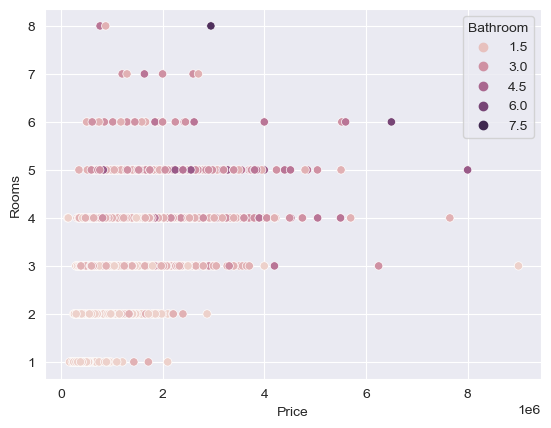

In [81]:
sns.scatterplot(x = 'Price', y = 'Rooms', hue = 'Bathroom', data = melbourne_data);

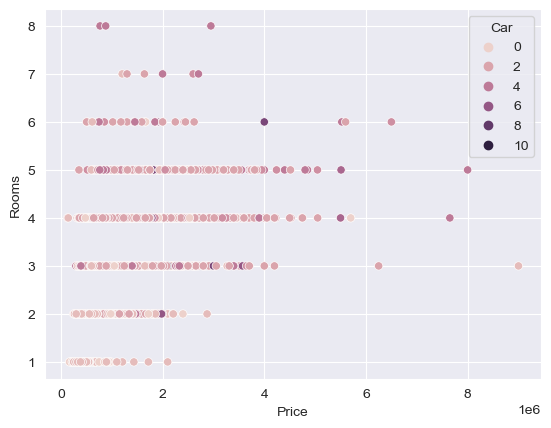

In [93]:
sns.scatterplot(x = 'Price', y = 'Rooms', hue = 'Car', data = melbourne_data);